## long acc 

In [9]:
import re

def parse_output_file(filename):
    with open(filename, 'r') as file:
        data = file.read()

    runs_data = re.findall(r'Run \d+:\nHighest Train: (\d+\.\d+)\nHighest Valid: (\d+\.\d+)\n  Final Train: (\d+\.\d+)\n   Final Test: (\d+\.\d+)', data)
    
    highest_train_list = []
    highest_valid_list = []
    final_train_list = []
    final_test_list = []

    for run_data in runs_data:
        highest_train, highest_valid, final_train, final_test = run_data

        highest_train_list.append(float(highest_train))
        highest_valid_list.append(float(highest_valid))
        final_train_list.append(float(final_train))
        final_test_list.append(float(final_test))

    return highest_train_list, highest_valid_list, final_train_list, final_test_list

results_no_opts = []
results_opts = []

for dataset in ('', 'flickr_', 'reddit_'):
    filename = f'../mem_speed_bench/output_{dataset}no_optimal_lo_long_acc.txt'
    results_no_opts.append(parse_output_file(filename))

    filename = f'../mem_speed_bench/output_{dataset}optimal_lo_long_acc.txt'
    results_opts.append(parse_output_file(filename))

In [16]:
import matplotlib.pyplot as plt
import numpy as np

datasets = ['arxiv', 'flickr', 'reddit']
acc_types = ['Highest Train', 'Highest Valid', 'Final Train', 'Final Test']

for i in range(3):
    for j in range(4):
        mean1 = np.mean(np.array(results_no_opts[i][j]))
        std1 = np.std(np.array(results_no_opts[i][j]))

        mean2 = np.mean(np.array(results_opts[i][j]))
        std2 = np.std(np.array(results_opts[i][j]))

        dataset_str = datasets[i]
        acc_str = acc_types[j]

        print(f'no opt:\n {dataset_str}\n  {acc_str}\n   mean: {mean1:.2f} ± {std1:.2f}')
        print(f'with opt:\n {dataset_str}\n  {acc_str}\n   mean: {mean2:.2f} ± {std2:.2f}')
        print()

no opt:
 arxiv
  Highest Train
   mean: 76.63 ± 0.13
with opt:
 arxiv
  Highest Train
   mean: 76.61 ± 0.14

no opt:
 arxiv
  Highest Valid
   mean: 72.49 ± 0.15
with opt:
 arxiv
  Highest Valid
   mean: 72.48 ± 0.13

no opt:
 arxiv
  Final Train
   mean: 76.26 ± 0.43
with opt:
 arxiv
  Final Train
   mean: 76.29 ± 0.33

no opt:
 arxiv
  Final Test
   mean: 71.25 ± 0.30
with opt:
 arxiv
  Final Test
   mean: 71.21 ± 0.32

no opt:
 flickr
  Highest Train
   mean: 98.49 ± 0.27
with opt:
 flickr
  Highest Train
   mean: 98.62 ± 0.15

no opt:
 flickr
  Highest Valid
   mean: 51.67 ± 0.21
with opt:
 flickr
  Highest Valid
   mean: 51.67 ± 0.21

no opt:
 flickr
  Final Train
   mean: 59.33 ± 2.37
with opt:
 flickr
  Final Train
   mean: 59.82 ± 2.49

no opt:
 flickr
  Final Test
   mean: 51.68 ± 0.26
with opt:
 flickr
  Final Test
   mean: 51.67 ± 0.25

no opt:
 reddit
  Highest Train
   mean: 98.87 ± 0.02
with opt:
 reddit
  Highest Train
   mean: 98.88 ± 0.02

no opt:
 reddit
  Highest Val

## non-linear plots

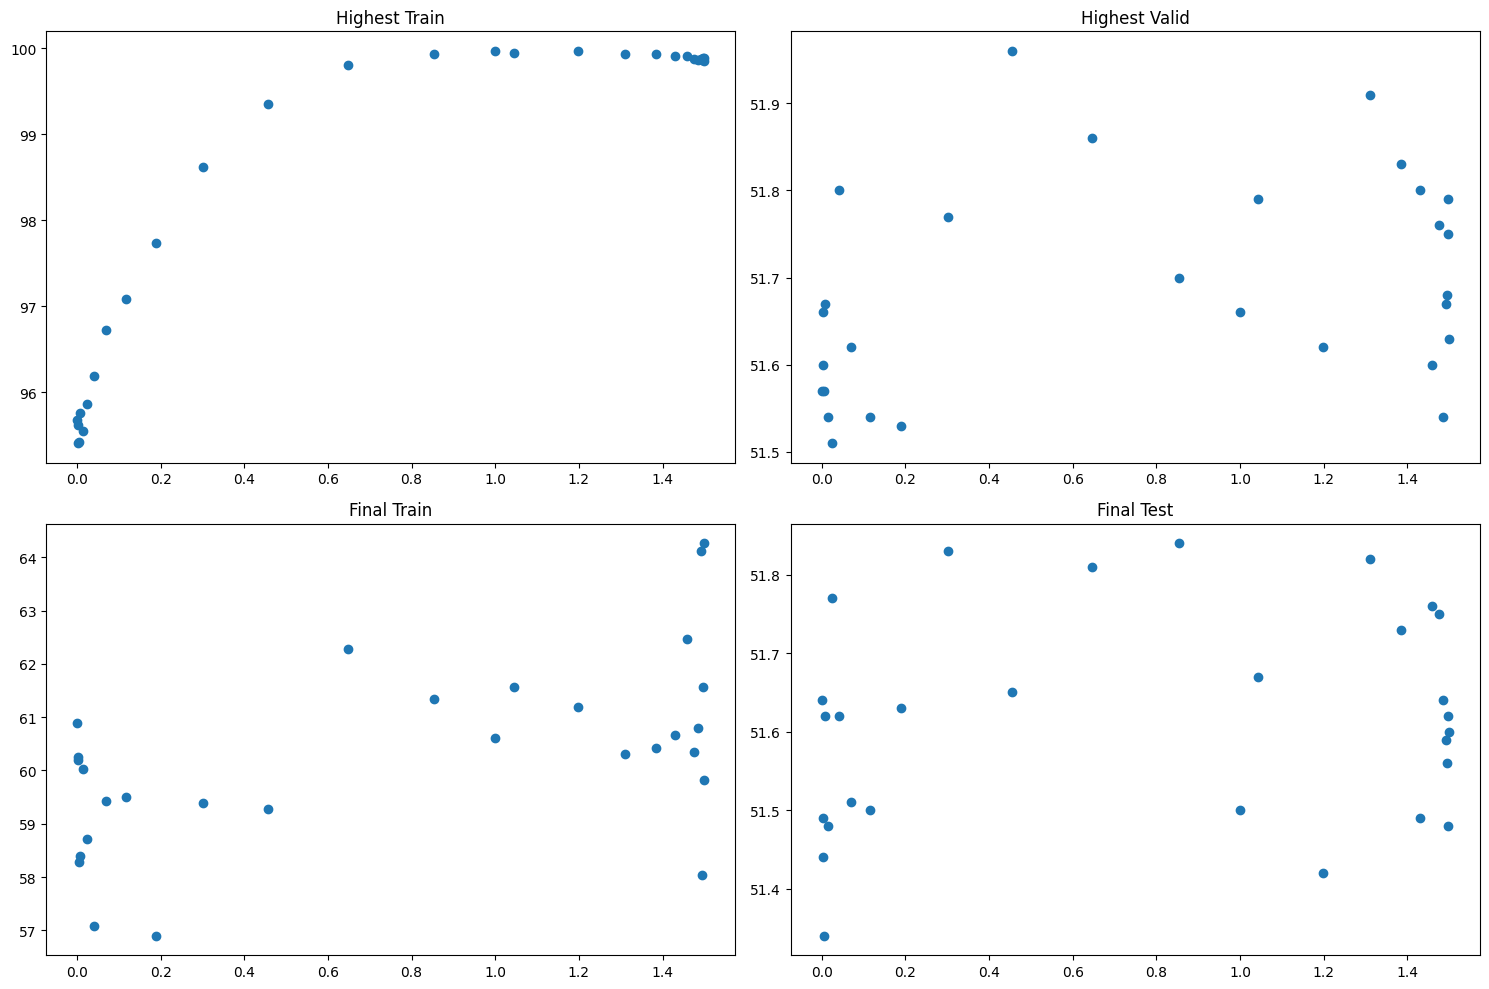

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to hold our parsed values
lo_vars = []
highest_trains = []
highest_train_stds = []
highest_valids = []
highest_valid_stds = []
final_trains = []
final_train_stds = []
final_tests = []
final_test_stds = []

# Iterate over the range of file names
for i in np.arange(0.001, 1.500, 0.001):
    filename = f'../mem_speed_bench/nonlin_results/output_lo_nonlin_test_{i:.3f}.txt'
    
    # Check if the file exists
    if os.path.isfile(filename):
        with open(filename, 'r') as file:
            # Read all lines in the file
            lines = file.readlines()
            
            # Check if there are enough lines
            if len(lines) < 4:
                continue
            
            # Parse the last four lines
            for line in lines[-4:]:
                # Split line into value and standard deviation
                parts = line.split('±')
                if len(parts) != 2:
                    continue
                
                value = float(parts[0].split(':')[-1].strip())
                std = float(parts[1].strip())
                
                # Add to the appropriate lists
                if 'Highest Train' in line:
                    highest_trains.append(value)
                    highest_train_stds.append(std)
                elif 'Highest Valid' in line:
                    highest_valids.append(value)
                    highest_valid_stds.append(std)
                elif 'Final Train' in line:
                    final_trains.append(value)
                    final_train_stds.append(std)
                elif 'Final Test' in line:
                    final_tests.append(value)
                    final_test_stds.append(std)
                    
                if i not in lo_vars:
                    lo_vars.append(i)

# Generate the plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].scatter(lo_vars, highest_trains)
axs[0, 0].set_title('Highest Train')

axs[0, 1].scatter(lo_vars, highest_valids)
axs[0, 1].set_title('Highest Valid')

axs[1, 0].scatter(lo_vars, final_trains)
axs[1, 0].set_title('Final Train')

axs[1, 1].scatter(lo_vars, final_tests)
axs[1, 1].set_title('Final Test')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Same data loading code...

# Quadratic fit function
def quadratic_fit_and_plot(x, y, ax, title):
    coefficients = np.polyfit(x, y, 2)
    polynomial = np.poly1d(coefficients)
    r_val = pearsonr(x, y)[0]
    
    x_line = np.linspace(min(x), max(x), 100)
    y_line = polynomial(x_line)
    
    ax.plot(x_line, y_line, color='red', label=f'Fit: {coefficients[0]:.2f}x² + {coefficients[1]:.2f}x + {coefficients[2]:.2f}, r = {r_val:.2f}')
    ax.legend()
    
    # Calculate vertex of the quadratic function (top point)
    a = coefficients[0]
    b = coefficients[1]
    c = coefficients[2]
    vertex_x = -b / (2 * a)
    vertex_y = c - (b ** 2) / (4 * a)
    ax.set_title(f'{title} (Top Point: ({vertex_x:.2f}, {vertex_y:.2f}))')
    ax.scatter(vertex_x, vertex_y, c='r')
    
    ax.set_xlabel('$\\alpha$')
    ax.set_ylabel('accuracy (%)')

# Generate the plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

print(lo_vars[np.argmax(highest_trains)])
axs[0, 0].scatter(lo_vars, highest_trains)
quadratic_fit_and_plot(lo_vars, highest_trains, axs[0, 0], 'Highest Train')

axs[0, 1].scatter(lo_vars, highest_valids)
quadratic_fit_and_plot(lo_vars, highest_valids, axs[0, 1], 'Highest Valid')

axs[1, 0].scatter(lo_vars, final_trains)
quadratic_fit_and_plot(lo_vars, final_trains, axs[1, 0], 'Final Train')

axs[1, 1].scatter(lo_vars, final_tests)
quadratic_fit_and_plot(lo_vars, final_tests, axs[1, 1], 'Final Test')

# Show the plot
plt.tight_layout()
plt.savefig('nonlin_exps.png', dpi=300)